In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [ ]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [ ]:
#Ознакомимся с датасетом посмотрим на общие статистики и графики.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int64
 1   B       5 non-null      int64
 2   C       5 non-null      int64
 3   D       5 non-null      int64
dtypes: int64(4)
memory usage: 288.0 bytes


In [ ]:
df.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,29.600000,45.000000,31.200000,60.000000
std,4.037326,11.202678,3.898718,8.514693
min,25.000000,29.000000,27.000000,51.000000
25%,28.000000,40.000000,29.000000,54.000000
50%,29.000000,45.000000,30.000000,60.000000
75%,30.000000,55.000000,33.000000,62.000000
max,36.000000,56.000000,37.000000,73.000000


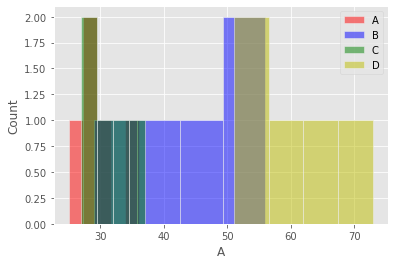

In [ ]:
sns.histplot(df['A'], color = 'r', alpha=0.5)
sns.histplot(df['B'], color = 'b', alpha=0.5)
sns.histplot(df['C'],  color = 'g', alpha=0.5)
sns.histplot(df['D'],  color = 'y', alpha=0.5)
plt.legend(df.columns)

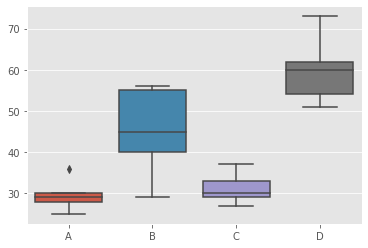

In [ ]:
sns.boxplot(data=df)

In [ ]:
#Кейс: Даны продажи филиалов компании за последние 4 месяца в млн. руб.
#А - Западный филиал
# B - Южный филиал
# С - Северный филиал
# D - Восточный филиал
#Задача проанализировать филиалы компании различается ли выручка филиалов.
#Если выручка различается то на сколько.

In [ ]:
# Исходя из графиков можно выделить 2 филиала Восточный (лидер) и Южный
# Выдвенем гипотезы 
#Н0 - средняя выручка филиалов одинакова
#Н2 - средняя выручка филиалов разная
#Уровень значимости = 0,05
# Проведем дисперсионный анализ.
#Создадим функцию.

In [ ]:
def dispersion_analysis(data, alpha=0.05):
  '''
  Однофакторный дисперсионный анализ.
  Нулевая гипотеза: A=B=C=D
  Альтернативная гипотеза: !(A=B=C=D)
  На вход принимает
   data - датафрейм
   alpha (уровень значимости) по умолчанию = 0.05
  '''
  data.boxplot()
  print('Нулевая гипотеза:', '='.join(data))
  print('Альтернативная гипотеза:', f'!({"=".join(data)})')
  # общая средняя
  grand_mean = data.values.flatten().mean()
  # Общая сумма квадратов sst = ssb + ssw
  sst = sum((val - grand_mean)**2 for val in data.values.flatten())
  # отклонение групповых средний от общей средней
  ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
  # отклонения значений внутри группы от средней группы
  ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

  groups = data.shape[1]
  # Степени свободы
  dfb = groups - 1
  dfw = data.size - groups
  # межгрупповой средний квадрат
  mssb = ssb/dfb
  # внутригрупповой средний квадрат
  mssw = ssw/dfw

  f_value = mssb/mssw

  p = stats.f.sf(f_value, dfb, dfw)
  print('Результат:')
  if p < alpha:
      print('отклоняем нулевую гипотезу')
  else:
      print('НЕ отклоняем нулевую гипотезу')
  print(f"Полученное f-значение {f_value}")

Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


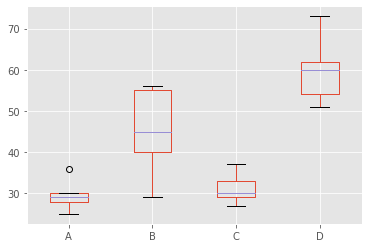

In [ ]:
dispersion_analysis(df)

In [ ]:
res = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print('f-value: {0}'.format(res[0]))
print('p-value: {0}'.format(res[1]))

f-value: 17.492810457516338
p-value: 2.639241146210922e-05


In [ ]:
#Вывод Н0 отклоняем, узнаем какую долю выручки компании приносит каждый филиал, заодно построим круговую диаграмму.

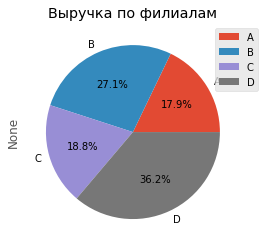

In [ ]:
office_revenue = df.sum()
office_revenue.plot(kind='pie', autopct='%1.1f%%', title='Выручка по филиалам')
plt.legend(bbox_to_anchor=(0.6, .5, 0.5, 0.5))

In [ ]:
#Узнаем во сколько раз отличается выручка у филиала с самой большой и маленькой выручкой

In [ ]:
A_mean = df['A'].mean()
D_mean = df['D'].mean()
print(f' Размер выручки в западном филиале на {round(D_mean/A_mean, 2)} меньше чем в восточном.')

 Размер выручки в западном филиале на 2.03 меньше чем в восточном.


<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [ ]:
# Соберем датафрейм из наших данных
tillamook_series = pd.Series(tillamook)
newport_series = pd.Series(newport)
petersburg_series = pd.Series(petersburg)
magadan_series = pd.Series(magadan)
tvarminne_series = pd.Series(tvarminne)
df_mussels = pd.concat([tillamook_series, newport_series, petersburg_series, magadan_series, tvarminne_series], axis=1)
df_mussels.columns = ['tillamook', 'newport', 'petersburg', 'magadan', 'tvarminne']

In [ ]:
df_mussels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tillamook   10 non-null     float64
 1   newport     8 non-null      float64
 2   petersburg  7 non-null      float64
 3   magadan     8 non-null      float64
 4   tvarminne   6 non-null      float64
dtypes: float64(5)
memory usage: 528.0 bytes


In [ ]:
# Заполним отсутствующие значения медианой (для проведения тестов)
df_mussels_fillna = df_mussels.fillna(df_mussels.median())
df_mussels_fillna

,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.10330,0.07030
1,0.0813,0.0662,0.1352,0.09150,0.10260
2,0.0831,0.0672,0.0817,0.07810,0.09560
3,0.0976,0.0819,0.1016,0.06850,0.09730
4,0.0817,0.0749,0.0968,0.06770,0.10390
5,0.0859,0.0649,0.1064,0.06970,0.10450
6,0.0735,0.0835,0.1050,0.07640,0.09995
7,0.0659,0.0725,0.1016,0.06890,0.09995
8,0.0923,0.0737,0.1016,0.07305,0.09995
9,0.0836,0.0737,0.1016,0.07305,0.09995


In [ ]:
#Посмотрим как изменились наши дисперсии
df_mussels.var()

tillamook     0.000143
newport       0.000074
petersburg    0.000263
magadan       0.000168
tvarminne     0.000168
dtype: float64

In [ ]:
df_mussels_fillna.var()

tillamook     0.000143
newport       0.000058
petersburg    0.000176
magadan       0.000135
tvarminne     0.000098
dtype: float64

In [ ]:
#Видим, что они к сожалению значительно изменились
#Возьмем данный факт на заметку

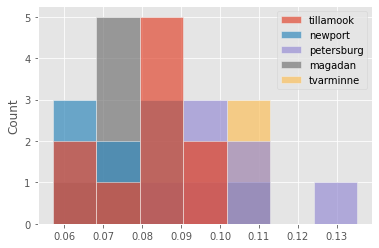

In [ ]:
#Построим визуализации
sns.histplot(df_mussels, alpha=0.7)

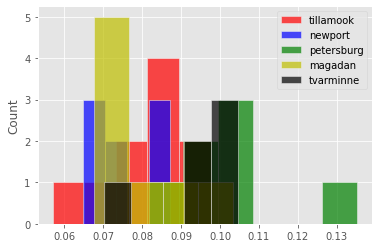

In [ ]:
sns.histplot(tillamook, color = 'r', alpha=0.7)
sns.histplot(newport, color = 'b', alpha=0.7)
sns.histplot(petersburg,  color = 'g', alpha=0.7)
sns.histplot(magadan,  color = 'y', alpha=0.7)
sns.histplot(tvarminne,  color = 'black', alpha=0.7)
plt.legend(['tillamook', 'newport', 'petersburg', 'magadan', 'tvarminne'])

[Text(0.5, 1.0, 'До заполнения пустых значений')]

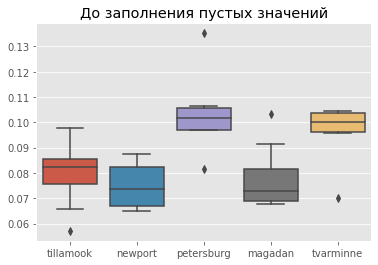

In [ ]:
#Визуально сравним как изменились бокcплоты до заполнения пустых значений и после
sns.boxplot(data=df_mussels).set(title = 'До заполнения пустых значений')

[Text(0.5, 1.0, 'После заполнения пустых значений, медианой')]

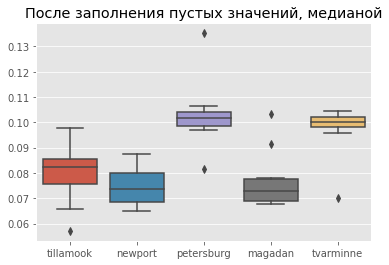

In [ ]:
sns.boxplot(data=df_mussels_fillna).set(title = 'После заполнения пустых значений, медианой')

In [ ]:
#Визуально в обоих случаях можем выделить 2 группы
#Проведем дисперсионный анализ всего дата сета и отдельно каждой группы
# Выдвинем следующие гипотезы
#Н0 - средний размер раковины одинаков
#Н2 - средний размер раковины разный
#Уровень значимости = 0,05

In [ ]:
res = stats.f_oneway(df_mussels_fillna['tillamook'], df_mussels_fillna['newport'], df_mussels_fillna['petersburg'], df_mussels_fillna['magadan'], df_mussels_fillna['tvarminne'])
print('p-value: {0}'.format(res[1]))

p-value: 2.590501182110271e-07


In [ ]:
# Вывод  p-value низкий
#H0 - отвергаем, средний размер раковины разный
#Проведем тест отдельно для каждой из групп

In [ ]:
res = stats.f_oneway(df_mussels_fillna['tillamook'], df_mussels_fillna['newport'], df_mussels_fillna['magadan'])
print('p-value: {0}'.format(res[1]))

p-value: 0.5005552128063633


In [ ]:
# Вывод  p-value высокий > 0.05
#H0 - нет оснований отвергнуть

In [ ]:
res = stats.f_oneway(df_mussels_fillna['petersburg'], df_mussels_fillna['tvarminne'])
print('p-value: {0}'.format(res[1]))

p-value: 0.30823756523969237


In [ ]:
# Вывод  p-value высокий > 0.05
#H0 - нет оснований отвергнуть
#Выясним во сколько раз размер раковины в tillamook, newport и magadan отличается от petersburg и tvarminne

In [ ]:
mean_TNM = df_mussels[['tillamook', 'newport', 'magadan']].apply(np.mean).mean()
mean_PT = df_mussels[['petersburg', 'tvarminne']].apply(np.mean).mean()
print(f' Размер раковины в petersburg и tvarminne больше чем в tillamook, newport, magadan на {round(mean_PT/mean_TNM, 2)}')

 Размер раковины в petersburg и tvarminne больше чем в tillamook, newport, magadan на 1.28


# Задачи с самостоятельным выбором теста

Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [ ]:
#Создадим датафрейм и построим визуализации.
df_medicine = pd.DataFrame([A, B]).transpose()
df_medicine.columns = 'A', 'B'
df_medicine.head()

,A,B
0,63.483642,121.694372
1,2.417810,17.287024
2,-3.536954,-81.045742
3,-68.599557,-92.553899
4,10.751461,65.911018


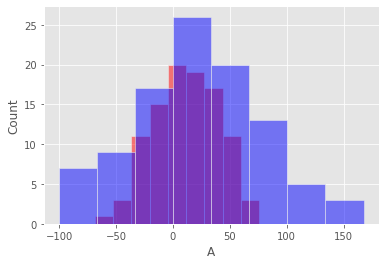

In [ ]:
sns.histplot(df_medicine['A'], color = 'r', alpha=0.5)
sns.histplot(df_medicine['B'], color = 'b', alpha=0.5)

[Text(0.5, 1.0, 'Результаты проверки препаратов А и В.')]

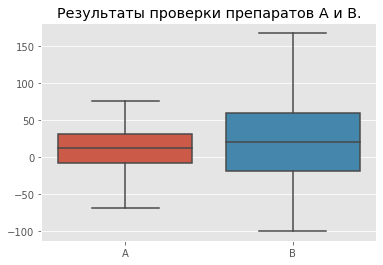

In [ ]:
sns.boxplot(data=df_medicine).set(title = 'Результаты проверки препаратов А и В.')

In [ ]:
#Исходя их визуализации можем предположить что данные распределенны нормально
# а так же медианы расположенны близко друк к другу.
#Проверим нормально ли распределенны данные.
#H0:  X∼N(⋅,⋅) 
#H1:  X≁N(⋅,⋅)
#Создадим функцию

In [ ]:
def test_shapiro(df, alpha = 0.05):
  '''
  Вычисляет T-критерий для среднего значения 
  Проверка гипотезы о нормальности распределения.
  H0:  X∼N(⋅,⋅) 
  H1:  X≁N(⋅,⋅) 
  Критерий Шапиро-Уилка scipy.stats.shapiro.
  Переменные на вход функции
  df - объект series, datafreim (массив данных float64)
  alpha (уровень значимости) по умолчанию = 0.05
  '''
  res = stats.shapiro(df)[1]
  if res > alpha:
    print(f'p-value = {res}, H0 нет оснований отвергнуть, данные распределены нормально')
  else:
    print(f'p-value = {res}, H0 отвергем, данные распределены не нормально')

In [ ]:
test_shapiro(df_medicine['A'])

p-value = 0.9671504497528076, H0 нет оснований отвергнуть, данные распределены нормально


In [ ]:
test_shapiro(df_medicine['B'])

p-value = 0.8480932116508484, H0 нет оснований отвергнуть, данные распределены нормально


In [ ]:
#pvalue высокий данные распределены нормально
#Проверим гипотезу равенства средних значений в двух выборках тест сдьдента.
#Уровень значимости 0.01 (в связи с тем что данные исследования относятся к сфере медицины и цена ошибки высока)
#H0:  μ1=μ2 
#H1:  μ1≠μ2
#Создадим функцию

In [ ]:
def ttest_ind(x, y, alpha = 0.05):
  '''
  Проверка гипотезы о равенстве средних значений.
  Для несвязных выборок
  H0:  μ1=μ2 
  H1:  μ1≠μ2 
  Переменные на вход функции
  x, y - объект series (массив данных float64)
  alpha (уровень значимости) по умолчанию = 0.05
  '''
  res = stats.ttest_ind(x, y)[1]
  if res > alpha:
    print(f'p-value = {res}, H0 нет оснований отвергнуть')
  else:
    print(f'p-value = {res}, H0 отвергем')

In [ ]:
ttest_ind(df_medicine['A'], df_medicine['B'], alpha = 0.01)

p-value = 0.08451003973499756, H0 нет оснований отвергнуть


In [ ]:
#pvalue высокий H0 нет оснований отвергнуть (Вероятно нет различия в эффекте от препаратов у пациентов)
#Проверим гипотезу равенстве медиан двух выборках Критерий Муда.
#Уровень значимости 0.01 (в связи с тем что данные исследования относятся к сфере медицины и цена ошибки высока)
#H0:  Медианы двух выборок равны
#H1:  Медианы двух выборок не равны
#Создадим функцию

In [ ]:
def median_ind(x, y, alpha = 0.05):
  '''
  Проверка гипотезы о равенстве медиан.
  #H0:  Медианы двух выборок равны
  #H1:  Медианы двух выборок не равны
  Переменные на вход функции
  x, y - объект series (массив данных float64)
  alpha (уровень значимости) по умолчанию = 0.05
  '''
  res = stats.median_test(x, y)[1]
  if res > alpha:
    print(f'p-value = {res}, H0 нет оснований отвергнуть')
  else:
    print(f'p-value = {res}, H0 отвергем')

In [ ]:
median_ind(df_medicine['A'], df_medicine['B'], alpha = 0.01)
 

p-value = 0.11979493042591895, H0 нет оснований отвергнуть


In [ ]:
#pvalue высокий H0 нет оснований отвергнуть (Вероятно нет различия в эффекте от препаратов у пациентов)
#Проверим гипотезу равенстве  о равенстве дисперсий Критерий Флингера-Килина.
#Уровень значимости 0.01 (в связи с тем что данные исследования относятся к сфере медицины и цена ошибки высока)
# H0:  σ1=σ2 
# H1:  σ1≠σ2 
#Создадим функцию

In [ ]:
def fligner(x, y, alpha = 0.05):
  '''
  Проверка гипотезы равенстве дисперсий Критерий Флингера-Килина.
  #H0:  Дисперсии двух выборок равны
  #H1:  Дисперсии двух выборок не равны
  Переменные на вход функции
  x, y - объект series (массив данных float64)
  alpha (уровень значимости) по умолчанию = 0.05
  '''
  res = stats.fligner(x, y)[1]
  if res > alpha:
    print(f'p-value = {res}, H0 нет оснований отвергнуть')
  else:
    print(f'p-value = {res}, H0 отвергем')

In [ ]:
fligner(df_medicine['A'], df_medicine['B'], alpha = 0.01)

p-value = 6.204327043014463e-08, H0 отвергем


In [ ]:
#pvalue низкий H0 отвергаем (Возможны различия в эффекте от препаратов у пациентов)

In [ ]:
#Выводы 
# По данным результатов проверки препаратов мы можем сказать следующее:
#Средние и медианные значения проверок равны, дисперсии сильно различаются. 
# В среднем различия в эффекте от препаратов у пациентов нет,
#но у препарата B, есть сильно отличающиеся значения как в большую 
# так и в меньшую сторону.
#Т.К. у нас нет физического смысла данных значений, незнаем какой 
# препарат, как он работает и т.д. (к примеру, данные могут означать 
# болевые ощущения от введения препарата, побочные эффекты, 
# изменение состояние пациента, исход болезни и т.д.)
#Мы можем констатировать только следующее у препарата В больший 
# разброс возможного эффекта от введения, как большую, так и в 
# меньшую сторону.
#Требуются дополнительные данные и исследования для оценки 
# эффекта от препаратов.


<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [ ]:
#Создадим датафрейм и построим визуализации.
df_cucumber = pd.DataFrame([water, nutri, mineral]).transpose()
df_cucumber.columns = 'water', 'nutri', 'mineral'
df_cucumber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    20 non-null     float64
 1   nutri    21 non-null     float64
 2   mineral  21 non-null     float64
dtypes: float64(3)
memory usage: 632.0 bytes


In [ ]:
# Заменим отсутствующие значения
# Построим визуализации
df_cucumber = df_cucumber.fillna(df_cucumber.median())
df_cucumber.head()

,water,nutri,mineral
0,1.0,1.0,2.0
1,2.0,2.0,1.0
2,3.0,4.0,1.0
3,4.0,6.0,3.0
4,2.0,5.0,2.0


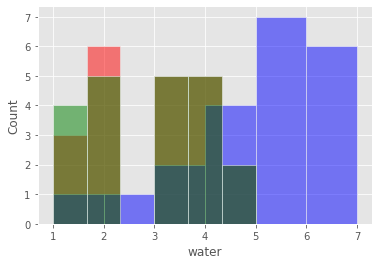

In [ ]:
sns.histplot(df_cucumber['water'], color = 'r', alpha=0.5)
sns.histplot(df_cucumber['nutri'], color = 'b', alpha=0.5)
sns.histplot(df_cucumber['mineral'], color = 'g', alpha=0.5)

[Text(0.5, 1.0, 'Эффект от удобрения')]

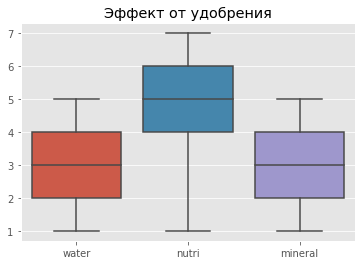

In [ ]:
sns.boxplot(data=df_cucumber).set(title = 'Эффект от удобрения')

In [ ]:
#Исходя из визуализации видим что возможно поливать лучше удобрением, проведем диспесрионный анализ.
#H0 - Разница в эффекте нет  
#Н1 - Разница в эффекте есть 
#Уровень значимости 0.05

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.784482758620694


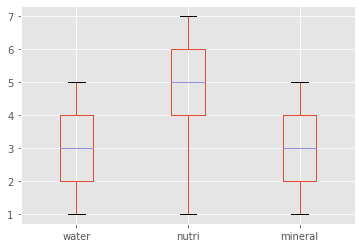

In [ ]:
dispersion_analysis(df_cucumber)

In [ ]:
median_ind(df_cucumber['nutri'], df_cucumber['mineral'], alpha = 0.05)

p-value = 0.0012805385594711117, H0 отвергем


In [ ]:
#Н0 отвергаем, разница в эффекте есть 
#Согласно заданию Используя дисперсионный анализ узнаем есть ли эффект от удобрения по сравнению с минералкой?
#Дополнительно проведем проверку гипотезы о равенстве медиан
#Н0 nutri=mineral
#Н1 nutri!=mineral

Нулевая гипотеза: nutri=mineral
Альтернативная гипотеза: !(nutri=mineral)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 18.128724672228852


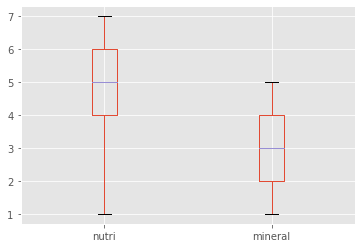

In [ ]:
dispersion_analysis(df_cucumber[['nutri', 'mineral']])

In [ ]:
median_ind(df_cucumber['nutri'], df_cucumber['mineral'], alpha = 0.05)

p-value = 0.0012805385594711117, H0 отвергем


In [ ]:
print(f"Гипотезу НО о том что разницы в эффекте нет отвергаем.\n\
Эффект есть.\n\
В среднем удобрениям эффективнее поливать огурцы \
в {round(df_cucumber['nutri'].mean()/df_cucumber['mineral'].mean(), 2)} \
раза чем минералкой и в {round(df_cucumber['nutri'].mean()/df_cucumber['water'].mean(), 2)} раза чем водой") 

Гипотезу НО о том что разницы в эффекте нет отвергаем.
Эффект есть.
В среднем удобрениям эффективнее поливать огурцы в 1.66 раза чем минералкой и в 1.63 раза чем водой


<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



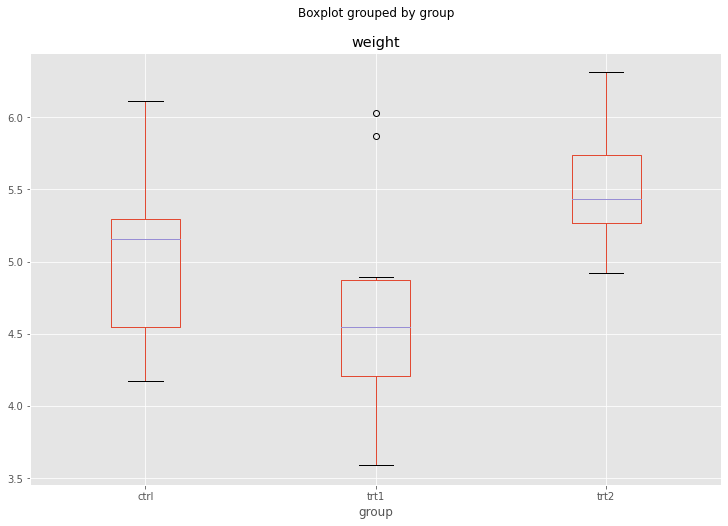

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   weight      30 non-null     float64
 2   group       30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [ ]:
ctrl = data['weight'][data['group'] == 'ctrl'].reset_index()
ctrl = ctrl['weight']
trt1 = data['weight'][data['group'] == 'trt1'].reset_index()
trt1 = trt1['weight']
trt2 = data['weight'][data['group'] == 'trt2'].reset_index()
trt2 = trt2['weight']

In [ ]:
#Создадим датафрейм и построим статистики.
df_yields = pd.DataFrame([ctrl, trt1, trt2]).transpose()
df_yields.columns = 'ctrl', 'trt1', 'trt2'
df_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ctrl    10 non-null     float64
 1   trt1    10 non-null     float64
 2   trt2    10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


In [ ]:
df_yields.describe()

,ctrl,trt1,trt2
count,10.000000,10.000000,10.000000
mean,5.032000,4.661000,5.526000
std,0.583091,0.793676,0.442573
min,4.170000,3.590000,4.920000
25%,4.550000,4.207500,5.267500
50%,5.155000,4.550000,5.435000
75%,5.292500,4.870000,5.735000
max,6.110000,6.030000,6.310000


In [ ]:
df_yields.head()

,ctrl,trt1,trt2
0,4.17,4.81,6.31
1,5.58,4.17,5.12
2,5.18,4.41,5.54
3,6.11,3.59,5.50
4,4.50,5.87,5.37


Нулевая гипотеза: ctrl=trt1=trt2
Альтернативная гипотеза: !(ctrl=trt1=trt2)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 4.846087862380137


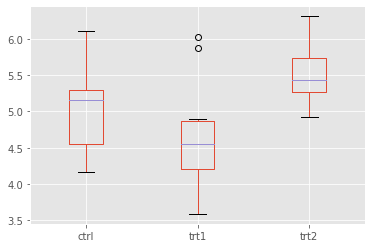

In [ ]:
#Исходя из визуализации видим что возможно поливать лучше удобрением trt2, проведем диспесрионный анализ.
#H0 - Разница в эффекте нет  
#Н1 - Разница в эффекте есть 
#Уровень значимости 0.05
dispersion_analysis(df_yields)

In [ ]:
#Н0 отвергаем, разница в эффекте есть 
#Проведем проверку гипотезы о равенстве медиан
#Н0 ctrl=trt2
#Н1 ctrl!=trt2
# Уровень значимости 0,05
median_ind(df_yields['ctrl'], df_yields['trt2'], alpha = 0.05)

p-value = 0.17971249487899593, H0 нет оснований отвергнуть


In [ ]:
#Проведем проверку гипотезы о равенстве медиан
#Н0 trt1=trt2
#Н1 trt1!=trt2
# Уровень значимости 0,05
median_ind(df_yields['trt1'], df_yields['trt2'])

p-value = 0.025347318677468325, H0 отвергем


In [ ]:
#Исходя из результатов проверки гипотез делаем предварительный вывод что возможно удобрения ctrl и trt2 одинаковы по эффективности.
#Продолжим исследовния этих 2 удобрений
#Проверим гипотезу равенстве  о равенстве дисперсий Критерий Флингера-Килина.
#Уровень значимости 0.05
# H0:  σ1=σ2 
# H1:  σ1≠σ2 
fligner(df_yields['trt1'], df_yields['trt2'])

p-value = 0.14048487518705172, H0 нет оснований отвергнуть


In [ ]:
#Проверим как распределенны данные
test_shapiro(df_yields)

p-value = 0.8914979696273804, H0 нет оснований отвергнуть, данные распределены нормально


In [ ]:
#Данные распределены нормально, проведем ttest проверем гипотезу о равенстве средних значений.
#Для несвязных выборок
#H0:  μ1=μ2 
#H1:  μ1≠μ2 
# Уровень значимости 0,05
ttest_ind(df_yields['ctrl'], df_yields['trt2'])

p-value = 0.04685138491157358, H0 отвергем


In [ ]:
#Выводы все таки  удобрения ctrl и trt2 отличаются
#Хотя p-value получился на пограничных значениях, но перед началом данного исследования мы установили уровень значимости 0,05
#Гипотезу мы отвергли и в результате получили результат что лучше поливать удобрением trt2
#Я бы посоветовал поливать удобрением trt2, но если по каким либо причинам (прекратили поставки) данного удобрения нет в наличии
#то можно и полить ctrl. Хотя может снизиться урожайность приблизительно на 10%.
#
#

In [ ]:
print(f"В среднем удобрениям trt2 поливать \
в {round(df_yields['trt2'].mean()/df_yields['ctrl'].mean(), 2)} \
раза выгодней чем ctrl, и в {round(df_yields['trt2'].mean()/df_yields['trt1'].mean(), 2)} раза чем trt1") 

В среднем удобрениям trt2 поливать в 1.1 раза выгодней чем ctrl, и в 1.19 раза чем trt1


# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [ ]:
#Исходя из статистических данных, различия есть. Возможно ворота на 30 уровне лучше работают.

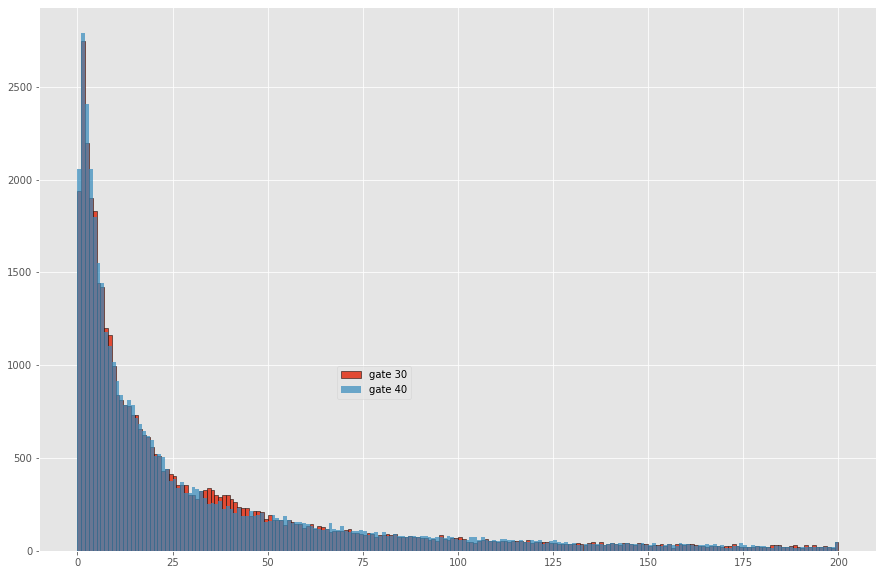

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

In [ ]:
#Сумарное кол-во проведенных раундов
#На визуализации мы видим, что после того как пользователь получил ворота на 30 уровне он более активно продолжил играть
# а когда получил ворота на 40 уровне играет так же как если бы он их не получал (как и те кто получил их на 30 уровне).
#Где-то после 40 уровня игровая активность сглаживается
#Можно выдвинуть следующую гипотезу ворота на 30 уровне ворота более эффективны чем на 40 уровне.
# Гипотеза Н0 различий нет
# Гипотеза Н1 есть различия

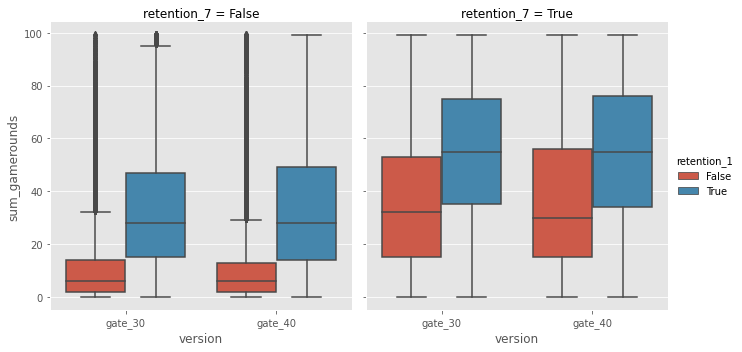

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1024331250.500, p=0.050


<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [ ]:
gate_30 = data['sum_gamerounds'][(data['version'] == 'gate_30') & (data['version'] == 'gate_30')]
gate_40 = data['sum_gamerounds'][(data['version'] == 'gate_40') & (data['version'] == 'gate_40')]

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [ ]:
 #Проведем проверку гипотезы о равенстве медиан
#Н0 gate_30=gate_40
#Н1 gate_30!=gate_40
# Уровень значимости 0,05
median_ind(gate_30, gate_40)

p-value = 0.011310113730407696, H0 отвергем


**Ваши выводы?** 

In [ ]:
 #Лучше оставить ворота на 30 уровне

In [ ]:
print(f"В среднем количество игровых раундов, сыгранных игроком в\n\
течение первой недели при установки ворот на 30 уровне \n\
в {round(gate_30.mean()/gate_40.mean(), 2)} \
раза больше чем количество игровых раундов,\n\
сыгранных игроком в течение первой недели при установки ворот на 40 уровне") 

В среднем количество игровых раундов, сыгранных игроком в
течение первой недели при установки ворот на 30 уровне 
в 1.02 раза больше чем количество игровых раундов,
сыгранных игроком в течение первой недели при установки ворот на 40 уровне


<Figure size 1080x720 with 0 Axes>

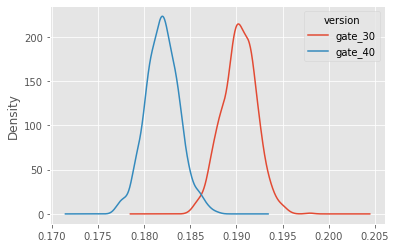

In [ ]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# сделайте выводы, используя t-тест для retention_1 и retention_7

In [ ]:
ttest_ind(df_medicine['A'], df_medicine['B'])

p-value = 0.08451003973499756, H0 нет оснований отвергнуть


In [ ]:
gate_30_retention_1 = data['sum_gamerounds'][(data['version'] == 'gate_30') & (data['retention_1'] == 1)]
gate_40_retention_1 = data['sum_gamerounds'][(data['version'] == 'gate_40') & (data['retention_1'] == 1)]
gate_30_retention_7 = data['sum_gamerounds'][(data['version'] == 'gate_30') & (data['retention_7'] == 1)]
gate_40_retention_7 = data['sum_gamerounds'][(data['version'] == 'gate_40') & (data['retention_7'] == 1)]

In [ ]:
#проведем ttest проверем гипотезу о равенстве средних значений.
#Для несвязных выборок
#H0:  μ1=μ2 
#H1:  μ1≠μ2 
# Уровень значимости 0,05
ttest_ind(gate_30_retention_1, gate_40_retention_1)

p-value = 0.47663010465013655, H0 нет оснований отвергнуть


In [ ]:
ttest_ind(gate_30_retention_7, gate_40_retention_7)

p-value = 0.9619482613634911, H0 нет оснований отвергнуть


In [ ]:
#Выводы
#H0 нет оснований отвергнуть
#Но лучше оставить ворота на 30 уровне, т.к. тест на равенство медиан дал отрицательный результат.

# Покемоны и AB-тестирование 


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
grass_attack = pokemon['Attack'][((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | \
                ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass'))]

In [ ]:
rock_attack = pokemon['Attack'][((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) | \
                ((pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock'))]

In [ ]:
# Уменьшим кол-во записей в grass_attack до количества записей rock_attack
grass_attack = grass_attack.sample(rock_attack.count())
grass_attack.count()

56

In [ ]:
# Проведем ttest 
#Гипотеза Н0 - покемоны в классе grass имеют такую же сильную обычную атаку, чем у покемонов в классе rock
#Гипотеза Н1 - покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock
ttest_ind(grass_attack, rock_attack)

p-value = 0.002238635394729235, H0 отвергем


In [ ]:
#Вывод покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
water_speed = pokemon['Speed'][((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) | \
                ((pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water '))]
normal_speed = pokemon['Speed'][((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water ')) | \
                ((pokemon['Class 1'] != 'Water ') & (pokemon['Class 2'] == 'Normal'))]

In [ ]:
water_speed.count()

112

In [ ]:
normal_speed.count()

102

In [ ]:
# Уменьшим кол-во записей в water_speed до количества записей normal_speed
water_speed = water_speed.sample(normal_speed.count())
water_speed.count()

102

In [ ]:
# Проведем ttest 
#Гипотеза Н0 - покемоны в классе Water в среднем такие же быстрые, как покемоны в классе Normal
#Гипотеза Н1 - покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal
ttest_ind(water_speed, normal_speed)

p-value = 0.098363816926977, H0 нет оснований отвергнуть


In [ ]:
#Вывод нет оснований отвергнуть гипотезу о том что покемоны в классе Water в среднем такие же быстрые, как покемоны в классе Normal

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
df_treathed_pokemon = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)].reset_index()
df_treathed_pokemon

,index,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
1,71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
2,428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
3,476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
df_NO_treathed_pokemon = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)].reset_index()

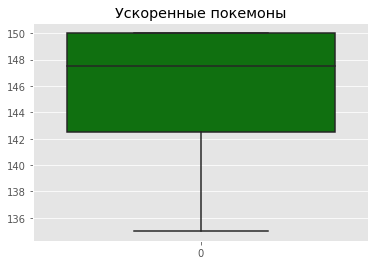

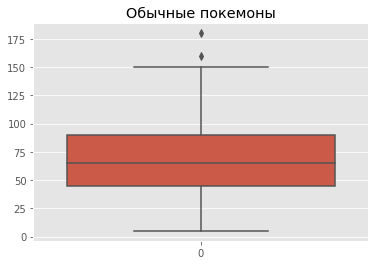

In [ ]:
sns.boxplot(data=df_treathed_pokemon['Speed'], color='green').set(title = 'Ускоренные покемоны')
plt.show()
sns.boxplot(data=pokemon['Speed']).set(title = 'Обычные покемоны')
plt.show()

In [ ]:
df_treathed_pokemon

,index,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
1,71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
2,428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
3,476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
#Проведем статистические тесты 
#Н0 Скорость treathed_pokemon = Скорости не ускоренных покемонов
#Н1 Скорость treathed_pokemon != Скорости не ускоренных покемонов

In [ ]:
ttest_ind(df_NO_treathed_pokemon['Speed'], df_treathed_pokemon['Speed'])

p-value = 9.51510117630786e-08, H0 отвергем


In [ ]:
median_ind(df_NO_treathed_pokemon['Speed'], df_treathed_pokemon['Speed'])

p-value = 0.12009489515696611, H0 нет оснований отвергнуть


In [ ]:
fligner(df_NO_treathed_pokemon['Speed'], df_treathed_pokemon['Speed'])

p-value = 0.03157199352664697, H0 отвергем


In [ ]:
#Посмотрим на самых быстрых покемонов
pokemon[pokemon['Speed']>134]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
109,110,Electrode,Electric,NaN,60,50,70,80,80,140,False
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
275,276,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,False
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,False
339,340,Mega Manectric,Electric,NaN,70,75,80,135,80,135,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True


In [ ]:
 #Вывод покемоны действительно быстрые, но есть покемоны которым не давали сываротку и они еще быстрее.
 #Эффективность вакцины не доказана

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon['sum'] = pokemon[['HP','Attack','Defense']].sum(axis=1)

In [ ]:
pokemon['multiplication'] = pokemon['HP']*pokemon['Attack']*pokemon['Defense']

In [ ]:
legendary = pokemon[pokemon['Legendary']==1].reset_index()
legendary


,index,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,multiplication
0,156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
1,157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
2,158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
3,162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
4,163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
61,796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
62,797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
63,798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [ ]:
no_legendary = pokemon[pokemon['Legendary']==0].reset_index()

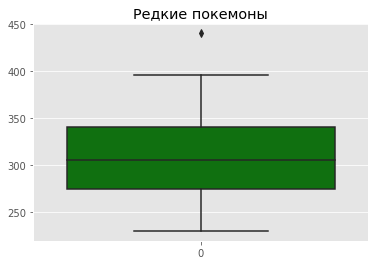

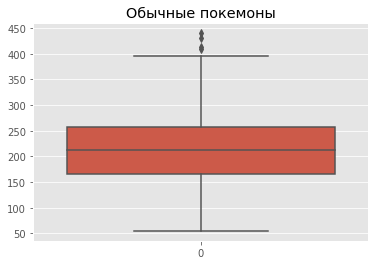

In [ ]:
# сумма характеристик HP,Attack,Defense
sns.boxplot(data=legendary['sum'], color='green').set(title = 'Редкие покемоны')
plt.show()
sns.boxplot(data=no_legendary['sum']).set(title = 'Обычные покемоны')
plt.show()

In [ ]:
#Проведем статистические тесты 
#Н0 сумма характеристик HP,Attack,Defense у легендарных покемонов такая же, как и у других покемонов
#Н1 сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

In [ ]:
median_ind(no_legendary['sum'], legendary['sum'])

p-value = 5.944154906999715e-17, H0 отвергем


In [ ]:
ttest_ind(no_legendary['sum'], legendary['sum'])

p-value = 7.970942205722087e-29, H0 отвергем


In [ ]:
#Вывод сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

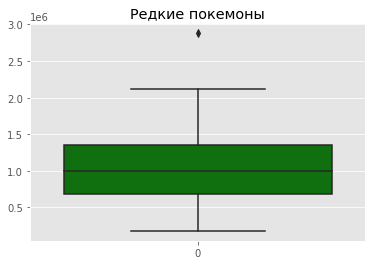

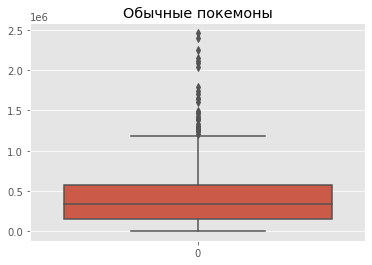

In [ ]:
# произведение характеристик HP,Attack,Defense
sns.boxplot(data=legendary['multiplication'], color='green').set(title = 'Редкие покемоны')
plt.show()
sns.boxplot(data=no_legendary['multiplication']).set(title = 'Обычные покемоны')
plt.show()

In [ ]:
#Проведем статистические тесты 
#Н0 произведение характеристик HP,Attack,Defense у легендарных покемонов такая же, как и у других покемонов
#Н1 произведение характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

In [ ]:
median_ind(no_legendary['multiplication'], legendary['multiplication'])

p-value = 7.3146973804223575e-16, H0 отвергем


In [ ]:
ttest_ind(no_legendary['multiplication'], legendary['multiplication'])

p-value = 1.992664308842282e-36, H0 отвергем


In [ ]:
#Вывод произведение характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
rock_class = pokemon['Defense'][((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Ground') \
                                 & (pokemon['Class 2'] != 'Steel') & (pokemon['Class 2'] != 'Ice')) \
                                 | ((pokemon['Class 1'] != 'Ground') & (pokemon['Class 1'] != 'Steel') \
                                 & (pokemon['Class 1'] != 'Ice') & (pokemon['Class 2'] == 'Rock'))].reset_index()

In [ ]:
ground_class = pokemon['Defense'][((pokemon['Class 1'] == 'Ground') & (pokemon['Class 2'] != 'Rock') \
                                 & (pokemon['Class 2'] != 'Steel') & (pokemon['Class 2'] != 'Ice')) \
                                 | ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 1'] != 'Steel') \
                                 & (pokemon['Class 1'] != 'Ice') & (pokemon['Class 2'] == 'Ground'))].reset_index()

In [ ]:
steel_class = pokemon['Defense'][((pokemon['Class 1'] == 'Steel') & (pokemon['Class 2'] != 'Rock') \
                                 & (pokemon['Class 2'] != 'Ground') & (pokemon['Class 2'] != 'Ice')) \
                                 | ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 1'] != 'Ground') \
                                 & (pokemon['Class 1'] != 'Ice') & (pokemon['Class 2'] == 'Steel'))].reset_index()

In [ ]:
ice_class = pokemon['Defense'][((pokemon['Class 1'] == 'Ice') & (pokemon['Class 2'] != 'Rock') \
                                 & (pokemon['Class 2'] != 'Ground') & (pokemon['Class 2'] != 'Steel')) \
                                 | ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 1'] != 'Ground') \
                                 & (pokemon['Class 1'] != 'Steel') & (pokemon['Class 2'] == 'Ice'))].reset_index()

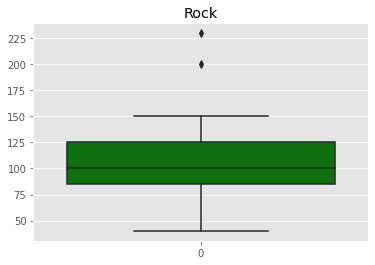

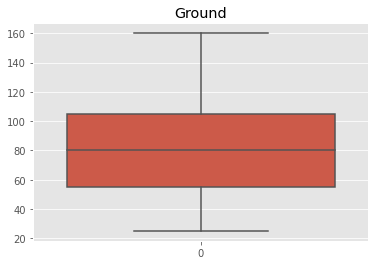

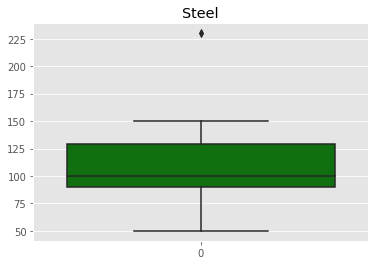

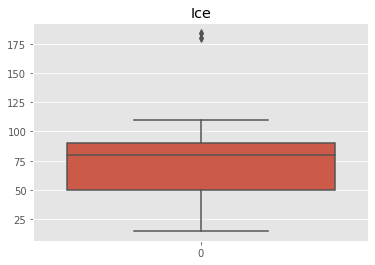

In [ ]:
sns.boxplot(data=rock_class['Defense'], color='green').set(title = 'Rock')
plt.show()
sns.boxplot(data=ground_class['Defense']).set(title = 'Ground')
plt.show()
sns.boxplot(data=steel_class['Defense'], color='green').set(title = 'Steel')
plt.show()
sns.boxplot(data=ice_class['Defense']).set(title = 'Ice')
plt.show()

In [ ]:
df_best_defence_class = pokemon.loc[pokemon['Class 1'].isin(best_defence_class)].reset_index()
df_best_defence_class_2 = pokemon.loc[pokemon['Class 2'].isin(best_defence_class)].reset_index()
df_best_defence_class.append(df_best_defence_class_2, ignore_index=True)
df_best_defence_class

,index,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,multiplication
0,32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750
1,33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000
2,55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750
3,56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False,165,140000
4,80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,220,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,777,778,Klefki,Steel,Fairy,57,80,91,80,87,75,False,228,414960
123,788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209,322575
124,789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False,396,2045160
125,795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000


In [ ]:
df_no_best_defence_class = pokemon.loc[~pokemon['Class 1'].isin(best_defence_class)].reset_index()
df_no_best_defence_class = df_no_best_defence_class.loc[~df_no_best_defence_class['Class 2'].isin(best_defence_class)].reset_index()
df_no_best_defence_class = df_no_best_defence_class.sample(df_best_defence_class['index'].count())
df_no_best_defence_class

,level_0,index,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,multiplication
146,153,173,174,Croconaw,Water,NaN,65,80,80,59,63,58,False,225,416000
347,375,444,445,Bidoof,Normal,NaN,59,45,40,35,40,31,False,144,106200
566,627,738,739,Floette,Fairy,NaN,54,45,47,75,98,52,False,146,114210
505,556,654,655,Jellicent,Water,Ghost,100,60,70,85,105,60,False,230,420000
321,347,406,407,Bagon,Dragon,NaN,45,75,60,40,30,50,False,180,202500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,88,95,96,Grimer,Poison,NaN,80,80,50,40,50,25,False,210,320000
144,151,171,172,Typhlosion,Fire,NaN,78,84,78,109,85,100,False,240,511056
59,61,65,66,Poliwag,Water,NaN,40,50,40,40,40,90,False,130,80000
441,485,570,571,Pansage,Grass,NaN,50,53,48,53,48,64,False,151,127200


In [ ]:
#Проведем статистические тесты 
#Н0 Эти классы покемонов не отличаются по уровню защиты от остальных покемонов
#Н1 Эти классы покемонов отличаются по уровню защиты от остальных покемонов

In [ ]:
ttest_ind(df_no_best_defence_class['Defense'], df_best_defence_class['Defense'])

p-value = 1.2866031527469086e-11, H0 отвергем


In [ ]:
median_ind(df_no_best_defence_class['Defense'], df_best_defence_class['Defense'])

p-value = 7.784649747177415e-10, H0 отвергем


In [ ]:
# Вывод Эти классы покемонов отличаются по уровню защиты от остальных покемонов

In [ ]:
rock_class_count = rock_class['Defense'].sample(ice_class['Defense'].count()).reset_index()
ground_class_count = ground_class['Defense'].sample(ice_class['Defense'].count()).reset_index()
steel_class_count = steel_class['Defense'].sample(ice_class['Defense'].count()).reset_index()

In [ ]:
data = {'rock_class': rock_class_count['Defense'], 'ground_class': ground_class_count['Defense'], 'steel_class': steel_class_count['Defense'], 'ice_class': ice_class['Defense']}
best_defence_class = pd.DataFrame(data)
best_defence_class

,rock_class,ground_class,steel_class,ice_class
0,65,90,70,80
1,90,45,100,180
2,105,68,115,35
3,97,100,150,80
4,125,45,95,100
5,85,65,70,55
6,100,77,129,45
7,65,40,100,15
8,115,125,140,50
9,110,43,230,80


Нулевая гипотеза: rock_class=ground_class=steel_class=ice_class
Альтернативная гипотеза: !(rock_class=ground_class=steel_class=ice_class)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 8.346771062023356


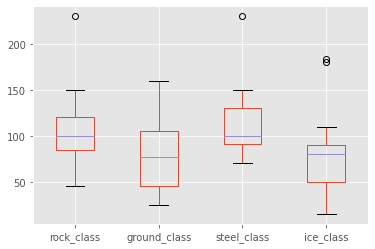

In [ ]:
#Проведем проведем дисперсионный анализ
#Н0 уровень защиты rock_class=ground_class=steel_class=ice_class
#Н1 уровень защиты !(rock_class=ground_class=steel_class=ice_class)
dispersion_analysis(best_defence_class, alpha=0.05)

In [ ]:
#Вывод нулевую гипотезу отклоняем уровень защиты разный